Exploratory data analysis is a crucial step in any data workflow. Create a Jupyter Notebook that explores your data mathematically and visually. Explore features, apply descriptive statistics, look at distributions, and determine how to handle sampling or any missing values.

Requirements:

1.Create an exploratory data analysis notebook. <br>2. Determine how to handle sampling or missing values.  <br>3. Perform statistical analysis, along with any visualizations. <br>4. Clearly identify shortcomings, assumptions, and next steps.

Submission:

Due Tuesday May 8.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from pandas.plotting import scatter_matrix

ow = pd.read_csv('assets/overwatch-diary.csv', index_col = 0)


<center><b>Data Dictionary:</b> https://docs.google.com/document/d/1aYqMaddLpN0Skgwa17HRg-jwqOZ0NVLyWd1-zyTXGro/edit?usp=sharing</center><br><br>

## 1. EXPLORATORY DATA ANALYSIS

In [2]:
#Review columns
ow.head()

,result,game_id,sr_start,sr_finish,sr_change,streak_number,my_team_sr,enemy_team_sr,map,round,...,character_2,character_3,psychological_condition,eliminations,objective_kills,healing,deaths,weapon_accuracy,offensive_assists,defensive_assists
season,,,,,,,,,,,,,,,,,,,,,
3,W,144.0,NaN,NaN,0,NaN,2912.0,2935.0,Hollywood,2.0,...,na,na,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,W,29.0,2866.0,2896.0,30,2.0,2532.0,2510.0,Oasis,5.0,...,na,na,Tense,41.0,26.0,10648.0,11816.0,13.0,19.0,11.0
3,W,508.0,2759.0,2782.0,23,NaN,2882.0,2865.0,Ilios,NaN,...,Ana,na,na,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,W,NaN,NaN,NaN,0,1.0,2637.0,2613.0,Volskaya Industries,2.0,...,na,na,Good,10.0,1.0,5001.0,3252.0,1.0,33.0,6.0
5,W,186.0,2441.0,2466.0,25,1.0,2425.0,2328.0,Volskaya Industries,1.0,...,na,na,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#determine data types of each feature
ow.dtypes

result                      object
game_id                    float64
sr_start                   float64
sr_finish                  float64
sr_change                    int64
streak_number              float64
my_team_sr                 float64
enemy_team_sr              float64
map                         object
round                      float64
capscore                   float64
score_distance             float64
team_role                   object
match_length               float64
charcter_1                  object
character_2                 object
character_3                 object
psychological_condition     object
eliminations               float64
objective_kills            float64
healing                    float64
deaths                     float64
weapon_accuracy            float64
offensive_assists          float64
defensive_assists          float64
dtype: object

In [4]:
#get general info of float features
ow.describe()

,game_id,sr_start,sr_finish,sr_change,streak_number,my_team_sr,enemy_team_sr,round,capscore,score_distance,match_length,eliminations,objective_kills,healing,deaths,weapon_accuracy,offensive_assists,defensive_assists
count,2292.000000,1472.000000,1472.000000,2939.000000,2023.000000,2700.000000,2688.000000,2810.000000,2602.000000,1288.000000,2777.000000,256.000000,256.000000,254.000000,255.000000,252.000000,141.000000,104.000000
mean,173.565445,2547.171875,2547.968750,0.399115,2.160652,2652.716667,2652.673735,1.940214,1.568025,72.831188,6.998192,15.011719,7.964844,5820.657480,9862.682353,9.396825,34.134752,7.711538
std,135.417174,206.293353,205.935244,96.387388,1.715523,228.574728,231.596376,1.004432,1.071181,122.092413,11.089483,10.498733,6.987575,4199.950578,4692.995499,5.613841,13.832271,9.251264
min,1.000000,1966.000000,1966.000000,-2654.000000,1.000000,1964.000000,1937.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000
25%,69.000000,2427.000000,2427.000000,-14.000000,1.000000,2524.000000,2521.000000,1.000000,1.000000,60.567500,4.000000,7.000000,2.000000,2534.500000,6829.000000,6.000000,24.000000,4.000000
50%,144.500000,2573.000000,2573.500000,0.000000,2.000000,2655.000000,2656.000000,2.000000,2.000000,71.750000,6.000000,14.000000,6.000000,5411.000000,9456.000000,9.000000,28.000000,6.000000
75%,220.000000,2681.000000,2682.000000,0.000000,3.000000,2821.000000,2822.000000,2.000000,2.000000,82.767500,8.000000,22.000000,11.000000,8571.500000,12829.500000,12.000000,44.000000,9.000000
max,538.000000,3017.000000,3008.000000,2698.000000,13.000000,3178.000000,3172.000000,6.000000,4.000000,4375.000000,535.000000,46.000000,34.000000,19226.000000,23700.000000,59.000000,66.000000,80.000000


## 2. DETERMINE HOW TO HANDLE MISSING VALUES

In [5]:
# Review missing values in each column
count_nan = len(ow) - ow.count()
count_nan

result                        0
game_id                     647
sr_start                   1467
sr_finish                  1467
sr_change                     0
streak_number               916
my_team_sr                  239
enemy_team_sr               251
map                           0
round                       129
capscore                    337
score_distance             1651
team_role                     0
match_length                162
charcter_1                    0
character_2                   0
character_3                   0
psychological_condition       0
eliminations               2683
objective_kills            2683
healing                    2685
deaths                     2684
weapon_accuracy            2687
offensive_assists          2798
defensive_assists          2835
dtype: int64

In [6]:
ow.mean()

game_id               173.565445
sr_start             2547.171875
sr_finish            2547.968750
sr_change               0.399115
streak_number           2.160652
my_team_sr           2652.716667
enemy_team_sr        2652.673735
round                   1.940214
capscore                1.568025
score_distance         72.831188
match_length            6.998192
eliminations           15.011719
objective_kills         7.964844
healing              5820.657480
deaths               9862.682353
weapon_accuracy         9.396825
offensive_assists      34.134752
defensive_assists       7.711538
dtype: float64

In [7]:
#finding missing values of float features
ow.median()

game_id               144.50
sr_start             2573.00
sr_finish            2573.50
sr_change               0.00
streak_number           2.00
my_team_sr           2655.00
enemy_team_sr        2656.00
round                   2.00
capscore                2.00
score_distance         71.75
match_length            6.00
eliminations           14.00
objective_kills         6.00
healing              5411.00
deaths               9456.00
weapon_accuracy         9.00
offensive_assists      28.00
defensive_assists       6.00
dtype: float64

In [8]:
#the significant missing values are mostly from float features, so let's fill nulls with the feature median
ow.fillna(ow.median(),inplace=True)

columns = ['game_id',        
'sr_start',       
'sr_finish',      
'streak_number',  
'my_team_sr',     
'enemy_team_sr',  
'round',          
'capscore',       
'score_distance', 
'match_length',   
'eliminations',   
'objective_kills',
'healing',        
'deaths',         
'weapon_accuracy',
'offensive_assists',
'defensive_assists']
for column in columns:
     ow[column].fillna(ow[column].mean(), inplace=True)

In [9]:
#confirming that null values are now filled w median
ow.describe()

,game_id,sr_start,sr_finish,sr_change,streak_number,my_team_sr,enemy_team_sr,round,capscore,score_distance,match_length,eliminations,objective_kills,healing,deaths,weapon_accuracy,offensive_assists,defensive_assists
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000
mean,167.166894,2560.063967,2560.712657,0.399115,2.110582,2652.902348,2652.957809,1.942838,1.617557,72.223824,6.943171,14.088125,6.171147,5446.404219,9491.285471,9.034025,28.294318,6.060565
std,120.185618,146.541028,146.275589,96.387388,1.425130,219.081407,221.484595,0.982210,1.017233,80.809353,10.781821,3.106142,2.131877,1237.841776,1384.621342,1.644617,3.291924,1.760819
min,1.000000,1966.000000,1966.000000,-2654.000000,1.000000,1964.000000,1937.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000
25%,90.000000,2573.000000,2573.000000,-14.000000,1.000000,2534.000000,2530.000000,1.000000,1.000000,71.750000,4.000000,14.000000,6.000000,5411.000000,9456.000000,9.000000,28.000000,6.000000
50%,144.500000,2573.000000,2573.500000,0.000000,2.000000,2655.000000,2656.000000,2.000000,2.000000,71.750000,6.000000,14.000000,6.000000,5411.000000,9456.000000,9.000000,28.000000,6.000000
75%,197.000000,2573.500000,2574.500000,0.000000,2.000000,2809.000000,2808.000000,2.000000,2.000000,71.750000,8.000000,14.000000,6.000000,5411.000000,9456.000000,9.000000,28.000000,6.000000
max,538.000000,3017.000000,3008.000000,2698.000000,13.000000,3178.000000,3172.000000,6.000000,4.000000,4375.000000,535.000000,46.000000,34.000000,19226.000000,23700.000000,59.000000,66.000000,80.000000


In [10]:
#create dummy variable for each object features
#result_dummy = pd.get_dummies(ow['result'])
result_dummy = pd.get_dummies(ow['result'])
map_dummy = pd.get_dummies(ow['map'])
role_dummy = pd.get_dummies(ow['team_role'])
hero1_dummy = pd.get_dummies(ow['charcter_1'])
hero2_dummy = pd.get_dummies(ow['character_2'])
hero3_dummy = pd.get_dummies(ow['character_3'])

In [11]:
#concetenate dummies into ow
ow = pd.concat([ow, result_dummy], axis = 1)
ow.describe()

,game_id,sr_start,sr_finish,sr_change,streak_number,my_team_sr,enemy_team_sr,round,capscore,score_distance,match_length,eliminations,objective_kills,healing,deaths,weapon_accuracy,offensive_assists,defensive_assists,L,W
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000
mean,167.166894,2560.063967,2560.712657,0.399115,2.110582,2652.902348,2652.957809,1.942838,1.617557,72.223824,6.943171,14.088125,6.171147,5446.404219,9491.285471,9.034025,28.294318,6.060565,0.501871,0.498129
std,120.185618,146.541028,146.275589,96.387388,1.425130,219.081407,221.484595,0.982210,1.017233,80.809353,10.781821,3.106142,2.131877,1237.841776,1384.621342,1.644617,3.291924,1.760819,0.500082,0.500082
min,1.000000,1966.000000,1966.000000,-2654.000000,1.000000,1964.000000,1937.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000
25%,90.000000,2573.000000,2573.000000,-14.000000,1.000000,2534.000000,2530.000000,1.000000,1.000000,71.750000,4.000000,14.000000,6.000000,5411.000000,9456.000000,9.000000,28.000000,6.000000,0.000000,0.000000
50%,144.500000,2573.000000,2573.500000,0.000000,2.000000,2655.000000,2656.000000,2.000000,2.000000,71.750000,6.000000,14.000000,6.000000,5411.000000,9456.000000,9.000000,28.000000,6.000000,1.000000,0.000000
75%,197.000000,2573.500000,2574.500000,0.000000,2.000000,2809.000000,2808.000000,2.000000,2.000000,71.750000,8.000000,14.000000,6.000000,5411.000000,9456.000000,9.000000,28.000000,6.000000,1.000000,1.000000
max,538.000000,3017.000000,3008.000000,2698.000000,13.000000,3178.000000,3172.000000,6.000000,4.000000,4375.000000,535.000000,46.000000,34.000000,19226.000000,23700.000000,59.000000,66.000000,80.000000,1.000000,1.000000


## 3. PERFORM STATISTICAL ANALYSIS ALONG WITH ANY VISUALIZATIONS


<IPython.core.display.Javascript object>


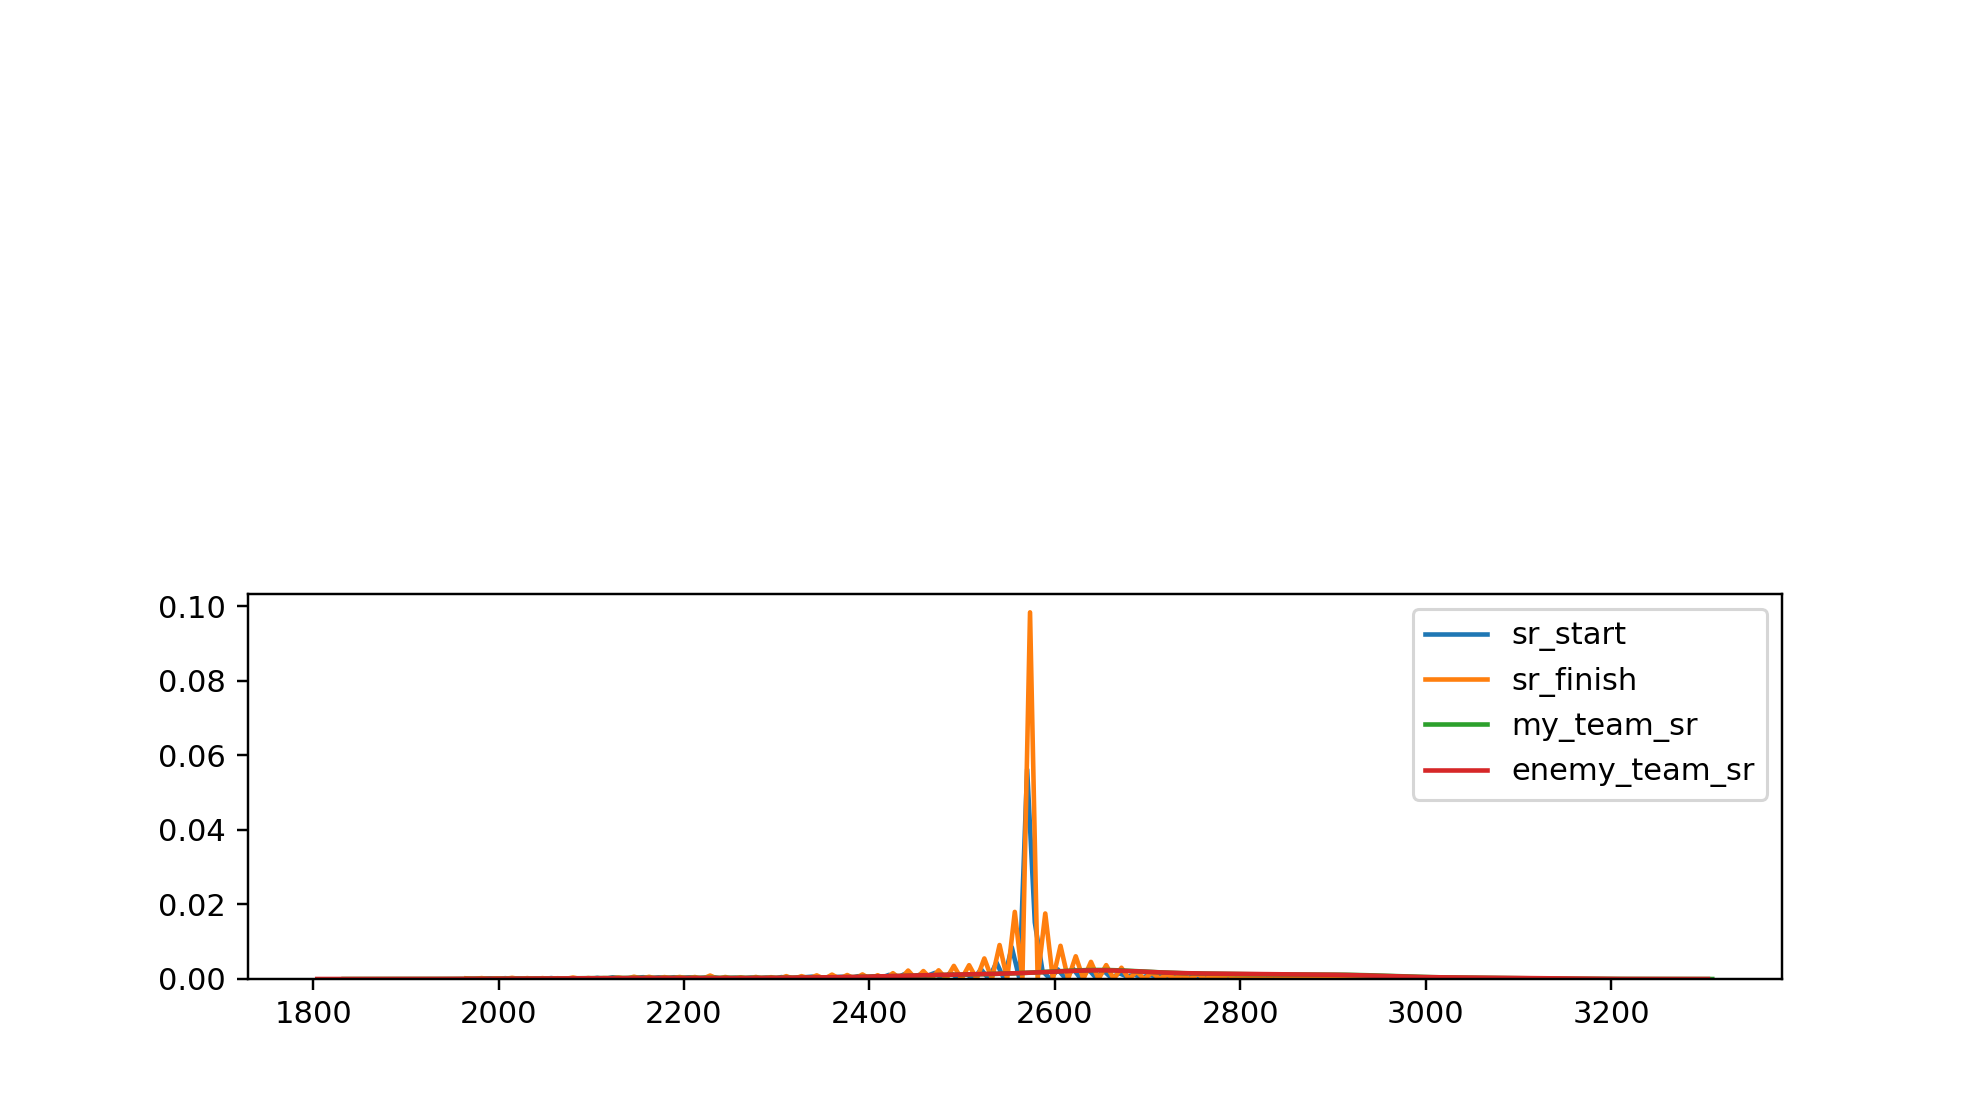

/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [12]:

plt.figure(figsize = (9, 5))


plt.subplot(212)
sns.kdeplot(ow['sr_start'])
plt.subplot(212)
sns.kdeplot(ow['sr_finish'])
plt.subplot(212)
sns.kdeplot(ow['my_team_sr'])
plt.subplot(212)
sns.kdeplot(ow['enemy_team_sr'])

<IPython.core.display.Javascript object>


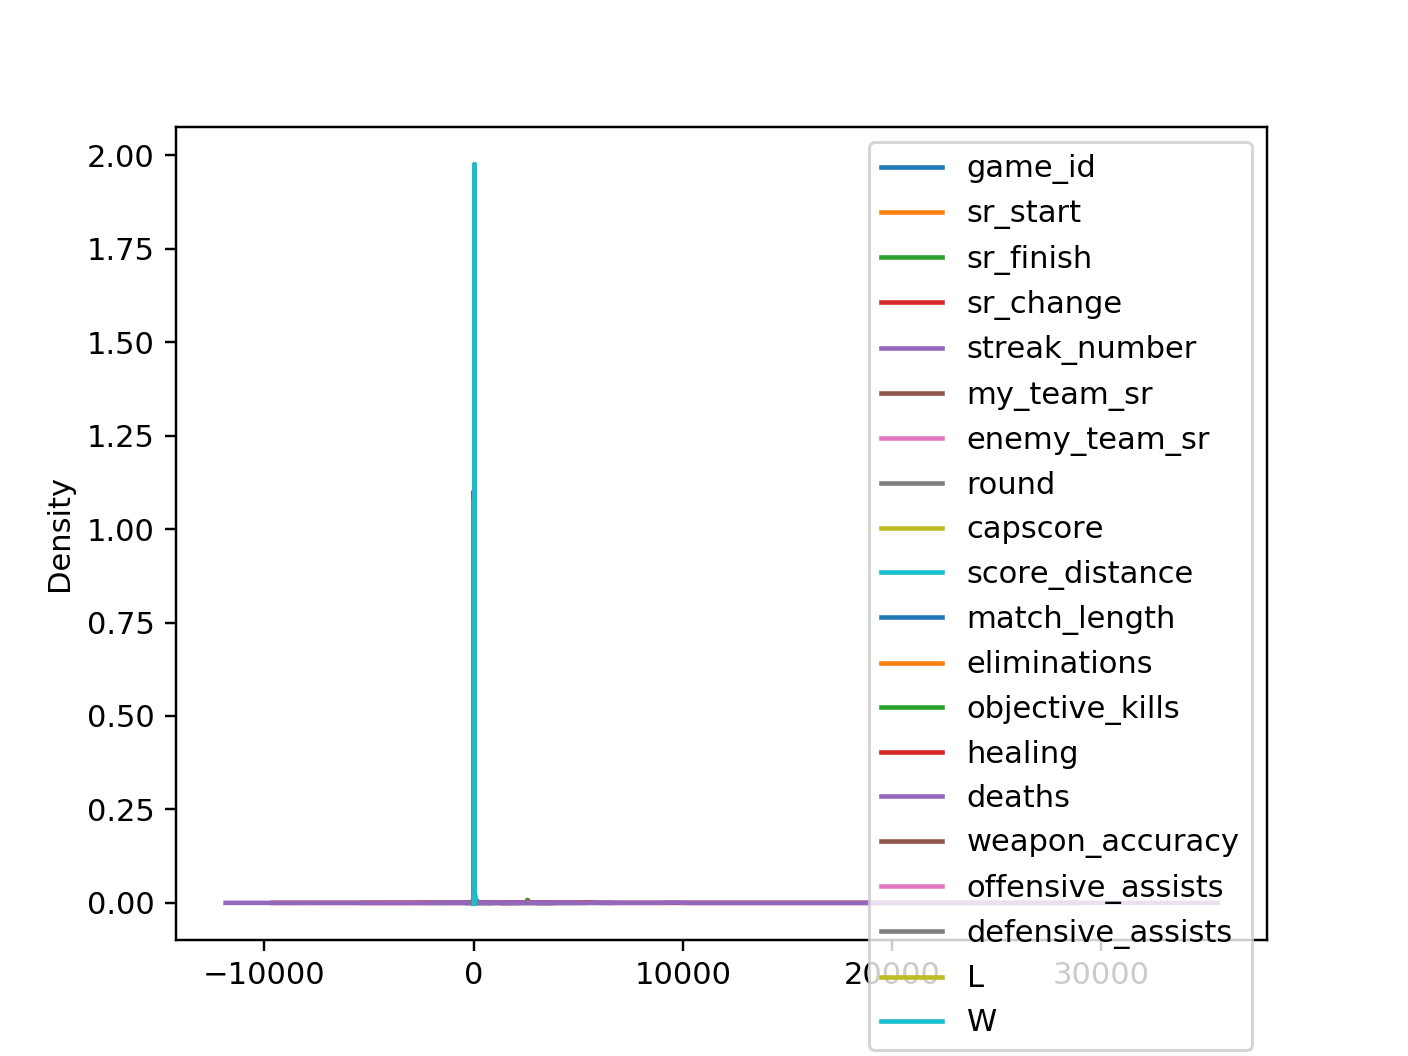

('This distribution has skew', game_id               1.255851
sr_start             -0.784927
sr_finish            -0.788799
sr_change             1.210844
streak_number         3.124656
my_team_sr           -0.490981
enemy_team_sr        -0.475761
round                 1.149720
capscore             -0.234132
score_distance       51.405209
match_length         40.253350
eliminations          2.935092
objective_kills       5.947341
healing               3.194246
deaths                2.597121
weapon_accuracy      10.382888
offensive_assists     7.584179
defensive_assists    33.221778
L                    -0.007489
W                     0.007489
dtype: float64)
('This distribution has kurtosis', game_id                 1.214779
sr_start                2.824845
sr_finish               2.842628
sr_change             688.269658
streak_number          14.085539
my_team_sr              0.317528
enemy_team_sr           0.335821
round                   1.048343
capscore               -1.010238
s

In [13]:
#determining if distributions have skew/kurtosis
ow.plot(kind = 'density')
print('This distribution has skew', ow.skew())
print('This distribution has kurtosis', ow.kurt())

<IPython.core.display.Javascript object>


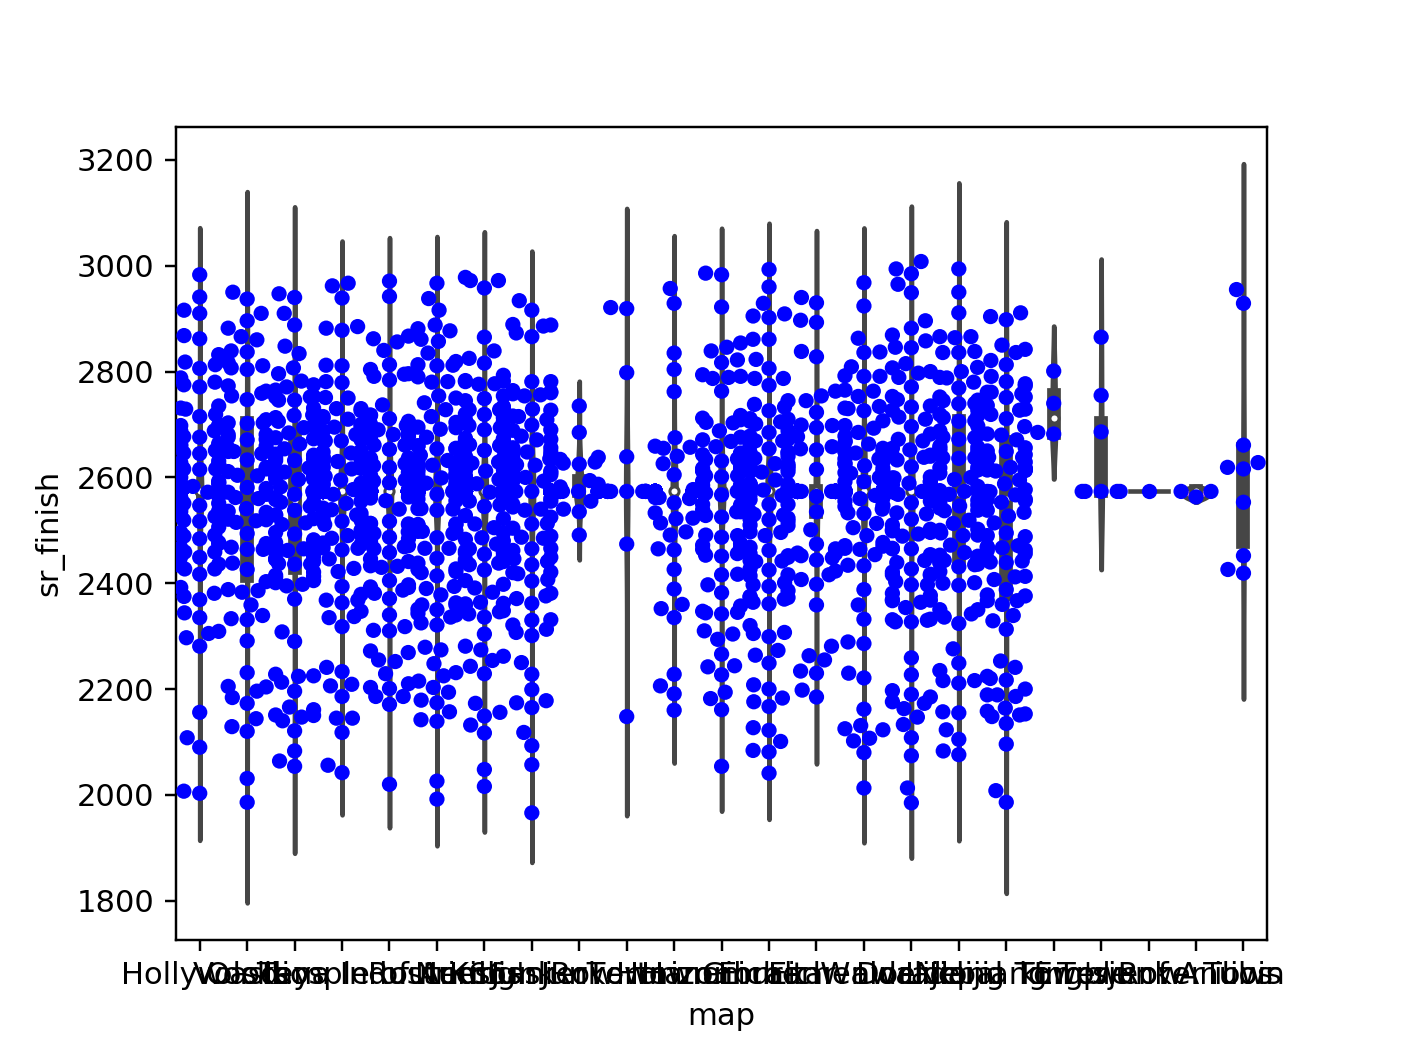

In [14]:
plt.figure()
sns.violinplot("map", "sr_finish", data = ow, split = True)
sns.swarmplot("map", "sr_finish", data = ow, color = "b",dodge = True)

In [15]:
#ATTEMPTING TO DECIPHER 'PSYCHOLOGICAL_CONDITION' COLUMN
#1. tokenizing
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('[a-zA-Z]\w+\'?\w*')
tokens = tokenizer.tokenize(str(ow['psychological_condition']))

In [16]:
#checking frequency distribution of most common phrases
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'Good': 12,
          'Great': 2,
          'Length': 1,
          'Meh': 10,
          'Name': 1,
          'Tense': 1,
          'Tilted': 5,
          'dtype': 1,
          'na': 30,
          'object': 1,
          'psychological_condition': 1,
          'season': 1})

<IPython.core.display.Javascript object>


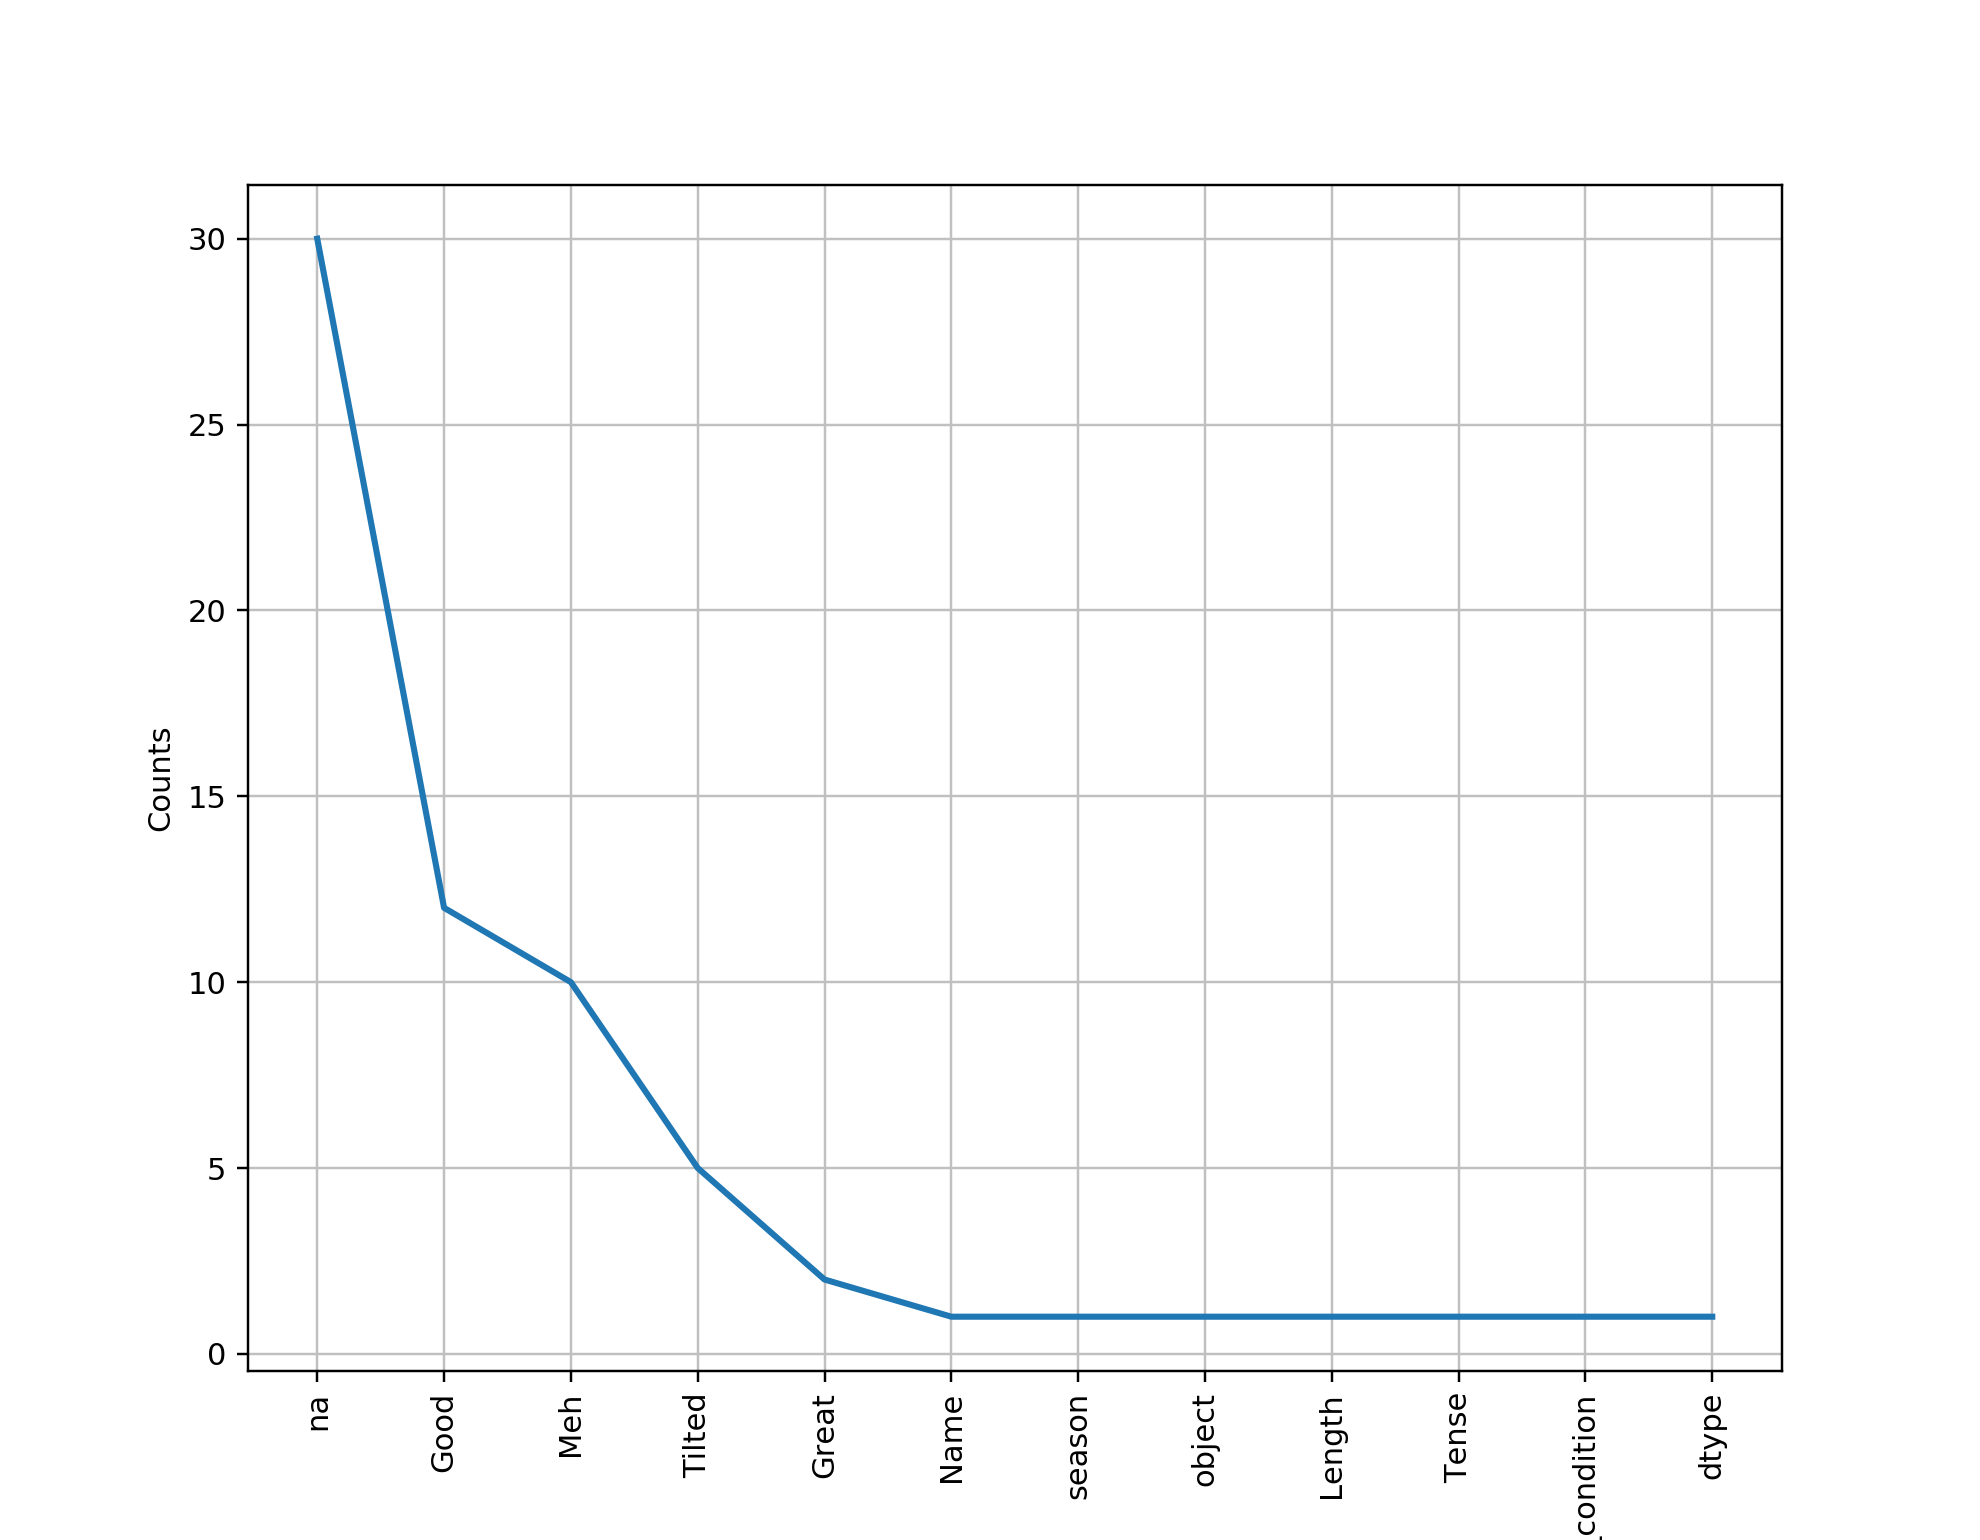

In [17]:
plt.figure(figsize = (9, 7))
fdist.plot(30)

<IPython.core.display.Javascript object>


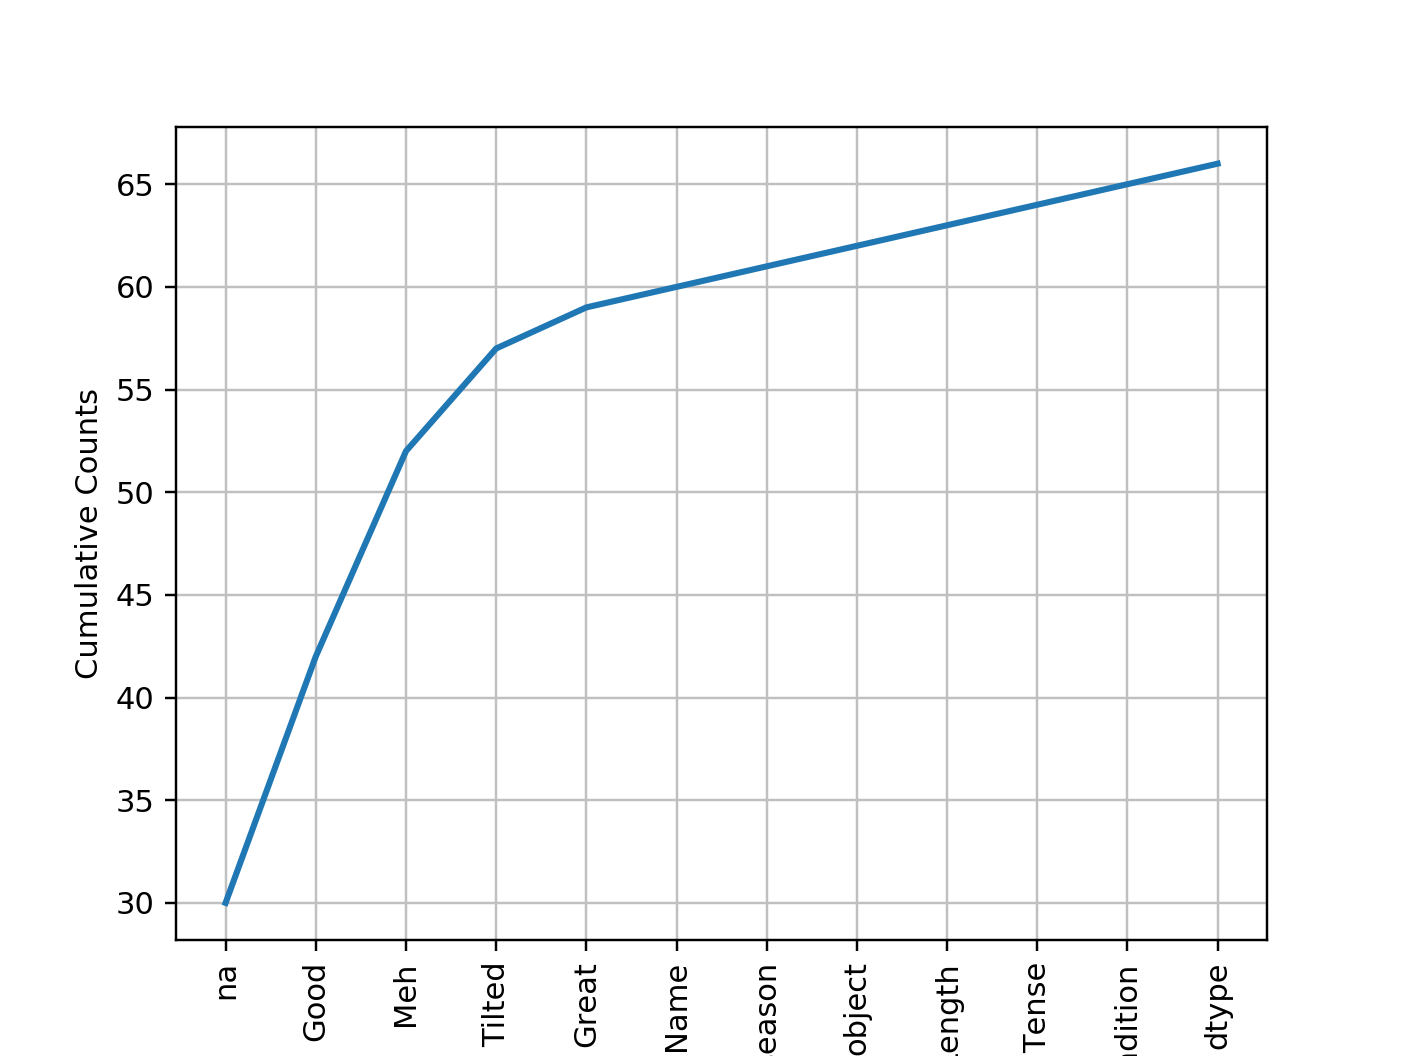

In [18]:
plt.figure()
fdist.plot(cumulative=True)

<IPython.core.display.Javascript object>


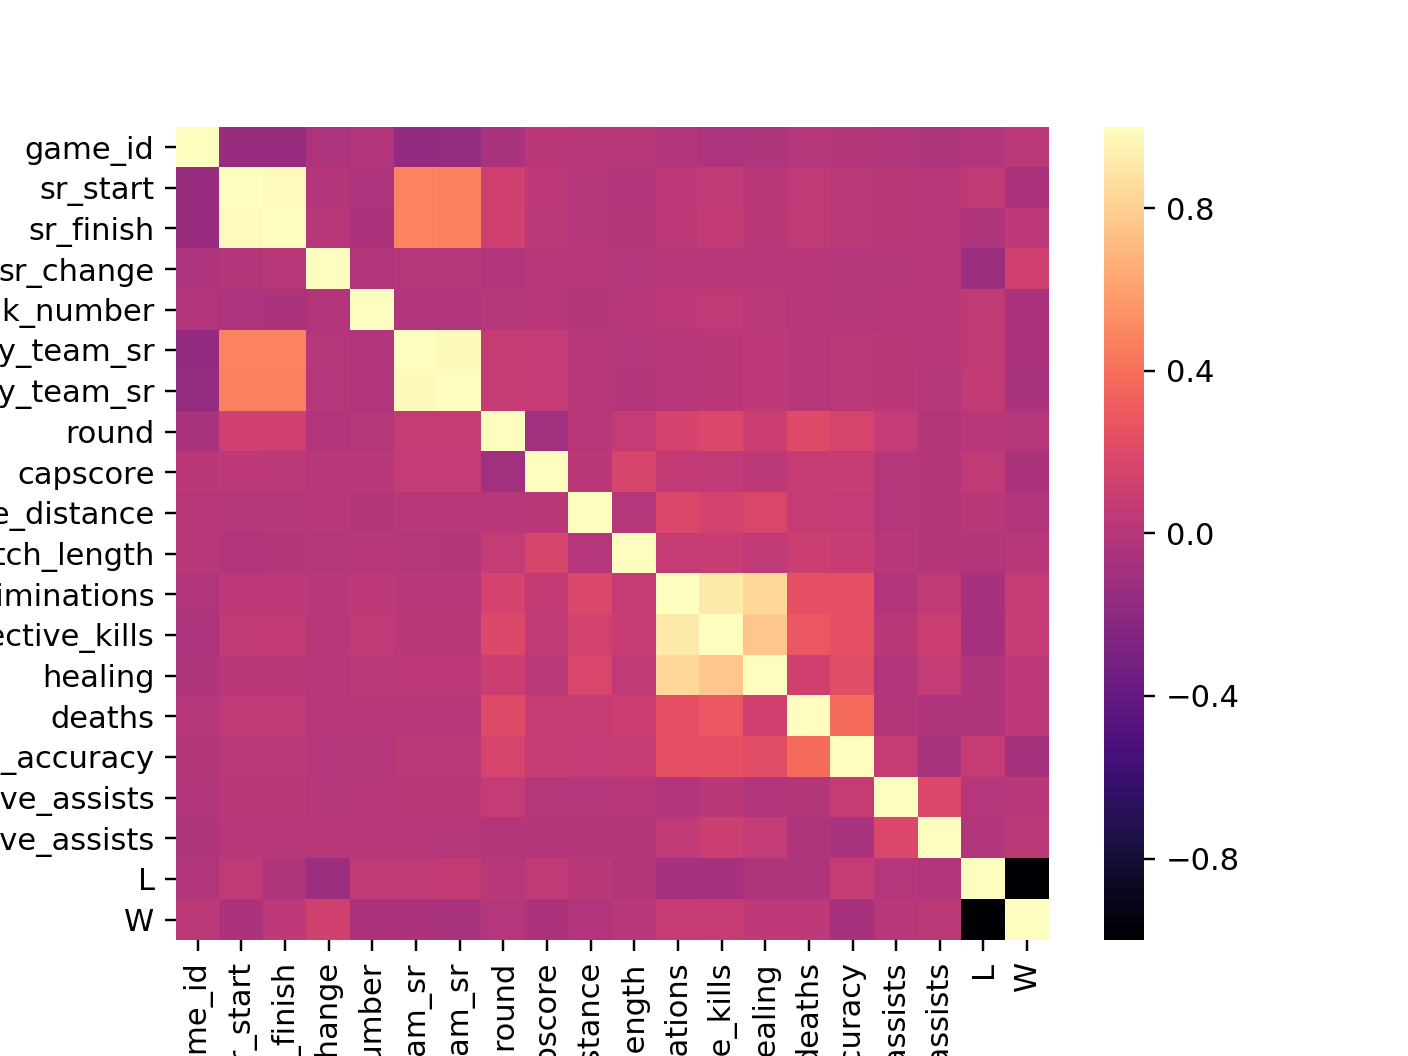

In [19]:
corr_mat = ow.corr()
plt.figure()
sns.heatmap(corr_mat, cmap = 'magma')

## SHORTCOMINGS, ASSUMPTIONS, NEXT-STEPS
## SHORTCOMINGS
- Need to figure out how to approach how to fill in nulls. For example, team_role has some empty values
- There is quite a bit data missing from some of the float features. It is worth considering whether it is enough instances to accurately predict result

## ASSUMPTIONS
- We are assuming that there are enough games played to accurately predict whether we will win or lose


## NEXT-STEPS
- Create alternate ways to determine how second and third heroes were picked
- Figure out how to fill nulls on Object values
- Create features that could be interesting (example: change in sr before and after match)